# COMP2501 Assignment 2
## Sibo Ding
## Spring 2023

### Environmental setup

In [1]:
import pandas as pd

### 1. (3 points) Load the built-in `airquality` dataset and view its first 6 rows. 1) Reshape the dataset (named `airquality_long`) using the `pivot_longer` function to convert the variables `Ozone`, `Solar.R`, `Wind`, and `Temp` into a new column named `Measurement`, with corresponding values in a new column named `Value`. 2) Reshape the `airquality_long` dataset (named `airquality_unite`) using the `unite` function to combine the `Month` and `Day` columns (with `-` as a separator) into a new column named `Date`. Use `head()` to show the results of each sub-question. (hint: you may refer to this link for information: https://www.statology.org/pivot_longer-in-r/)

In [2]:
airquality = pd.read_csv('airquality.csv')
airquality.head() # First 6 rows

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [3]:
# 1)
airquality_long = pd.melt(airquality, id_vars=['Month', 'Day'], 
                          value_vars=['Ozone', 'Solar.R', 'Wind', 'Temp'],
                          var_name='Measurement', value_name='Value')
airquality_long.head()

,Month,Day,Measurement,Value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


In [4]:
# 2)
airquality_unite = airquality_long.copy()
airquality_unite['Date'] = airquality_unite['Month'].astype(str)\
    + '-' + airquality_unite['Day'].astype(str)
airquality_unite.drop(columns=['Month', 'Day']).head()

,Measurement,Value,Date
0,Ozone,41.0,5-1
1,Ozone,36.0,5-2
2,Ozone,12.0,5-3
3,Ozone,18.0,5-4
4,Ozone,NaN,5-5


### 2. (3 points) Join the following `customers` and `orders` data frames by `customer_id`, with different join function, including: `left_join`, `right_join`, `inner_join`, `full_join`, `semi_join`, `anti_join` (separately), and print the corresponding results (named `left_join_df`, `right_join_df`, `inner_join_df`, `full_join_df`, `semi_join_df` and `anti_join_df` respectively). (hint: https://www.rdocumentation.org/packages/dplyr/versions/0.7.8/topics/join, https://dplyr.tidyverse.org/reference/mutate-joins.html)

In [5]:
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'customer_name': ['Alice', 'Bob', 'Charlie', 'Dave', 'Eve'],
    'city': ['New York', 'San Francisco', 'Boston', 'Seattle', 'Chicago']
    })
orders = pd.DataFrame({
    'customer_id': [1, 1, 2, 2, 2, 3, 3, 4, 5],
    'order_id': [101, 102, 201, 202, 203, 301, 302, 401, 501],
    'order_amount': [100, 200, 150, 75, 225, 300, 225, 175, 250]
    })

# If there are multiple matches between Left and Right,
# all combinations of the matches are returned.
left_join_df = pd.merge(customers, orders, how='left', on='customer_id')
left_join_df

,customer_id,customer_name,city,order_id,order_amount
0,1,Alice,New York,101,100
1,1,Alice,New York,102,200
2,2,Bob,San Francisco,201,150
3,2,Bob,San Francisco,202,75
4,2,Bob,San Francisco,203,225
5,3,Charlie,Boston,301,300
6,3,Charlie,Boston,302,225
7,4,Dave,Seattle,401,175
8,5,Eve,Chicago,501,250


In [6]:
right_join_df = pd.merge(customers, orders, how='right', on='customer_id')
right_join_df

,customer_id,customer_name,city,order_id,order_amount
0,1,Alice,New York,101,100
1,1,Alice,New York,102,200
2,2,Bob,San Francisco,201,150
3,2,Bob,San Francisco,202,75
4,2,Bob,San Francisco,203,225
5,3,Charlie,Boston,301,300
6,3,Charlie,Boston,302,225
7,4,Dave,Seattle,401,175
8,5,Eve,Chicago,501,250


In [7]:
inner_join_df = pd.merge(customers, orders, how='inner', on='customer_id')
inner_join_df

,customer_id,customer_name,city,order_id,order_amount
0,1,Alice,New York,101,100
1,1,Alice,New York,102,200
2,2,Bob,San Francisco,201,150
3,2,Bob,San Francisco,202,75
4,2,Bob,San Francisco,203,225
5,3,Charlie,Boston,301,300
6,3,Charlie,Boston,302,225
7,4,Dave,Seattle,401,175
8,5,Eve,Chicago,501,250


In [8]:
full_join_df = pd.merge(customers, orders, how='outer', on='customer_id')
full_join_df

,customer_id,customer_name,city,order_id,order_amount
0,1,Alice,New York,101,100
1,1,Alice,New York,102,200
2,2,Bob,San Francisco,201,150
3,2,Bob,San Francisco,202,75
4,2,Bob,San Francisco,203,225
5,3,Charlie,Boston,301,300
6,3,Charlie,Boston,302,225
7,4,Dave,Seattle,401,175
8,5,Eve,Chicago,501,250


In [9]:
# Return all rows from Left where there are matching values in Right,
# keeping just columns from Left.
semi_join_df = customers[customers['customer_id'].isin(orders['customer_id'])]
semi_join_df

,customer_id,customer_name,city
0,1,Alice,New York
1,2,Bob,San Francisco
2,3,Charlie,Boston
3,4,Dave,Seattle
4,5,Eve,Chicago


In [10]:
# Return all rows from Left where there are not matching values in Right,
# keeping just columns from Left.
anti_join_df = customers[~customers['customer_id'].isin(orders['customer_id'])]
anti_join_df

,customer_id,customer_name,city


### 3. (2 points) Find the union, intersection and difference of the following `df1` and `df2` data frames, and print the corresponding results (named `union_df`, `intersect_df`, `setdiff_df_1_2` and `setdiff_df_2_1` respectively).

In [11]:
df1 = pd.DataFrame({'id': [1, 2, 3], 'value': ['a', 'b', 'c']})
df2 = pd.DataFrame({'id': [3, 4, 5], 'value': ['c', 'd', 'e']})

concat_df = pd.concat([df1, df2], axis=0)
union_df = concat_df.drop_duplicates().reset_index(drop=True)
union_df

,id,value
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e


In [12]:
intersect_df = concat_df[concat_df.duplicated()].reset_index(drop=True)
intersect_df

,id,value
0,3,c


In [13]:
setdiff_df_1_2 = pd.concat([df1, intersect_df], axis=0)\
    .drop_duplicates(keep=False).reset_index(drop=True)
setdiff_df_1_2

,id,value
0,1,a
1,2,b


In [14]:
setdiff_df_2_1 = pd.concat([df2, intersect_df], axis=0)\
    .drop_duplicates(keep=False).reset_index(drop=True)
setdiff_df_2_1

,id,value
0,4,d
1,5,e


### 4. (3 points) Scrape the 1) movie titles, 2) their ratings, and 3) release years from the IMDb Top Rated Movies webpage (https://www.imdb.com/chart/top/) with the `rvest` package. Store the data in a data frame (named `movies`) and print the top 10 observations in `movies`. (hint: https://jtr13.github.io/cc19/web-scraping-using-rvest.html)

In [15]:
import requests

# https://stackoverflow.com/questions/39710903/pd-read-html-imports-a-list-rather-than-a-dataframe
url = 'https://www.imdb.com/chart/top/'
req = requests.get(url)
tab_list = pd.read_html(req.text)
movies = tab_list[0] # Get the first table

movies = movies[['Rank & Title', 'IMDb Rating']]\
    .rename(columns={'Rank & Title': 'title', 'IMDb Rating': 'rating'})
# Extract release year within ( )
movies['release_year'] = movies['title'].str.extract('\((\d{4})\)')
# Remove everything after "  (" and before ".  "
movies['title'] = movies['title']\
    .str.replace('\s{2}\((.*)', '', regex=True)\
    .str.replace('(.*)\.\s{2}', '', regex=True)
movies.head(10)

,title,rating,release_year
0,The Shawshank Redemption,9.2,1994
1,The Godfather,9.2,1972
2,The Dark Knight,9.0,2008
3,The Godfather Part II,9.0,1974
4,12 Angry Men,9.0,1957
5,Schindler's List,8.9,1993
6,The Lord of the Rings: The Return of the King,8.9,2003
7,Pulp Fiction,8.8,1994
8,The Lord of the Rings: The Fellowship of the Ring,8.8,2001
9,"Il buono, il brutto, il cattivo",8.8,1966


### 5. (3 points) Using the `stringr` package in R, perform the following tasks: 1) Extract all the phone numbers from the following text: "Please call us at 123-456-7890 or 555-555-5555." 2) Extract all the email addresses from the following text: "Contact us at info@example.com or support@example.com." 3) Replace all the URLs (https://www.xxx.com) in the following text with the string "URL": "Check out our website at https://www.example.com and our blog at https://blog.example.com.". Print the corresponding results.

In [16]:
import re

# \d: digit, {}: numbers of occurrence
print(re.findall('\d{3}-\d{3}-\d{4}', 
           'Please call us at 123-456-7890 or 555-555-5555.'))

# \w: word character; +: pne or more occurrences
print(re.findall('\w+@\w+.\w+', 
           'Contact us at info@example.com or support@example.com.'))

print(re.sub('\w+://\w+.\w+.\w+', 'URL', 
       'Check out our website at https://www.example.com ' + \
           'and our blog at https://blog.example.com.'))

['123-456-7890', '555-555-5555']
['info@example.com', 'support@example.com']
Check out our website at URL and our blog at URL.


### 6. (2 points) Using the `lubridate` package in R, parse the `date_time` column in the `date_data` and create new columns for standard `date` and `time` components, and print the final results.

In [17]:
date_data = pd.DataFrame({'date_time': ['2023-02-22 7:30:15', 
                                        '2023-02-23 12:15:30', 
                                        '2023-02-24 23:59:59']})

date_data['date'] = pd.to_datetime(date_data['date_time']).dt.date
date_data['time'] = pd.to_datetime(date_data['date_time']).dt.time
date_data

,date_time,date,time
0,2023-02-22 7:30:15,2023-02-22,07:30:15
1,2023-02-23 12:15:30,2023-02-23,12:15:30
2,2023-02-24 23:59:59,2023-02-24,23:59:59


### 7. (17 points) Explore the advanced data wrangling with the `gutenbergr` package and its corresponding datasets, and answer the following questions.

#### a. (1 points) Install the `gutenbergr` package and load the `gutenberg_metadata` as `books`. Print the first 6 rows, the number of observations (rows) and variables (columns), and the names of all variables in `books`.

In [18]:
books = pd.read_csv('books.csv')
print(f'First 5 rows:\n{books.head()}')
print(f'\nNumber of observations, Number of variables: {books.shape}')
print(f'\nNames of variables:\n {books.columns}') 

First 5 rows:
   gutenberg_id                                              title  \
0             1  The Declaration of Independence of the United ...   
1             2  The United States Bill of Rights\r\r\nThe Ten ...   
2             3                John F. Kennedy's Inaugural Address   
3             4  Lincoln's Gettysburg Address\r\r\nGiven Novemb...   
4             5                     The United States Constitution   

                               author  gutenberg_author_id language  \
0                   Jefferson, Thomas               1638.0       en   
1                       United States                  1.0       en   
2  Kennedy, John F. (John Fitzgerald)               1666.0       en   
3                    Lincoln, Abraham                  3.0       en   
4                       United States                  1.0       en   

                                 gutenberg_bookshelf  \
0  Politics/American Revolutionary War/United Sta...   
1  Politics/American Revol

C:\Users\22447\AppData\Local\Temp\ipykernel_7764\3100338679.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


#### b. (2 points) Remove any rows in `books` that have missing values in the `author` column, and then count the number of books for each author in a descending order. Who has the most publications and what's the exact numer (ignoring `Various` and `Anonymous` as an author name)?

In [19]:
books.dropna(axis=0, subset='author')\
    .groupby('author').count()\
    .sort_values(by='title', ascending=False).head()

# Shakespeare, William has the most publications (326).

,gutenberg_id,title,gutenberg_author_id,language,gutenberg_bookshelf,rights,has_text
author,,,,,,,
Various,3798,3798,3798,3798,2522,3798,3798
Anonymous,867,867,867,867,195,867,867
"Shakespeare, William",326,326,326,326,93,326,326
"Twain, Mark",235,235,235,235,44,235,235
"Lytton, Edward Bulwer Lytton, Baron",223,223,223,223,57,223,223


#### c. (2 points) Create a subset of `books` with only `Shakespeare, William`'s English publications, named `shakespeare_books`. Print the first 6 rows in `shakespeare_books`. 

In [20]:
shakespeare_books = books[
    (books['author'] == 'Shakespeare, William') & (books['language'] == 'en')]
shakespeare_books.head()

,gutenberg_id,title,author,gutenberg_author_id,language,gutenberg_bookshelf,rights,has_text
98,100,The Complete Works of William Shakespeare,"Shakespeare, William",65.0,en,Plays,Public domain in the USA.,True
1018,1041,Shakespeare's Sonnets,"Shakespeare, William",65.0,en,NaN,Public domain in the USA.,True
1022,1045,Venus and Adonis,"Shakespeare, William",65.0,en,NaN,Public domain in the USA.,True
1073,1100,The First Part of Henry the Sixth,"Shakespeare, William",65.0,en,NaN,Copyrighted. Read the copyright notice inside ...,True
1074,1101,The Second Part of King Henry the Sixth,"Shakespeare, William",65.0,en,NaN,Copyrighted. Read the copyright notice inside ...,True


#### d. (4 points) Filter the dataset `shakespeare_books` to only include specifically the book `Hamlet` as `shakespeare_hamlet`, and extract only `gutenberg_id`, `title` and `author` columns to save, and if there are more that one observation in `shakespeare_hamlet`, just preserve the first observation with `slice()`. Then use `gutenberg_download()` to download the corresponding texts according to `shakespeare_hamlet$gutenberg_id` as `hamlet_text`. Lastly join `shakespeare_hamlet` and `hamlet_text` with `left_join()` as `hamlet_data`, and remove any missing values in the `text` column as well as convert the `text` column to lowercase.

In [21]:
from urllib.request import urlopen

shakespeare_hamlet = shakespeare_books[shakespeare_books['title'] == 'Hamlet']\
    [['gutenberg_id', 'title', 'author']].head(1)

# Download "Hamlet" text
# https://realpython.com/python-web-scraping-practical-introduction/
gutenberg_id = 1787
url = f'https://www.gutenberg.org/files/{gutenberg_id}/{gutenberg_id}.txt'
page = urlopen(url)
hamlet_text_str = page.read().decode('utf-8')

# Convert text to dataframe
hamlet_text = pd.DataFrame(
    [i for i in hamlet_text_str.split('\n')], columns=['text'])[4:]
hamlet_text['gutenberg_id'] = gutenberg_id

# Lastly
hamlet_data = pd.merge(
    shakespeare_hamlet, hamlet_text, how='left', on='gutenberg_id')\
    .dropna(axis=0, subset='text')
hamlet_data['text'] = hamlet_data['text'].str.lower()

hamlet_data.head()

,gutenberg_id,title,author,text
0,1787,Hamlet,"Shakespeare, William",**********************************************...
1,1787,Hamlet,"Shakespeare, William",this ebook was one of project gutenberg's earl...
2,1787,Hamlet,"Shakespeare, William",time when proofing methods and tools were not ...
3,1787,Hamlet,"Shakespeare, William",is an improved edition of this title which may...
4,1787,Hamlet,"Shakespeare, William",(#100) at https://www.gutenberg.org/ebooks/100\r


#### e. (4 points) Perform sentiment analysis on `hamlet_data` using the `tidytext` package. First, get the sentiment lexicon `afinn` through `get_sentiments()` using the `textdata` package and store it in `hamlet_sentiments`. Second, extract each token in `text` column of `hamlet_data` with `unnest_tokens()`. Third, remove the stop words with `anti_join()`. Fourth, join it with `hamlet_sentiments` by `inner_join`. Fifth, count the number of the combination of `word` and its sentiment `value` in a descending order by using `count(your_data, word, value, sort=TRUE/FALSE)`, saved as `hamlet_words`. (hint: http://rafalab.dfci.harvard.edu/dsbook/text-mining.html#sentiment-analysis)

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# First
hamlet_sentiments = pd.read_csv('sentiments_afinn.csv')
# To get afinn sentiment value, can also use package and iterate each word
# from afinn import Afinn
# Afinn().score('love')

# Second
# https://towardsdatascience.com/5-simple-ways-to-tokenize-text-in-python-92c6804edfc4
hamlet_token = pd.DataFrame(
    word_tokenize(hamlet_text_str.lower()), columns=['word'])

# Third
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
stop_words = pd.DataFrame(stopwords.words('english'), columns=['word'])

# Fourth
hamlet_join = hamlet_token[~hamlet_token['word'].isin(stop_words['word'])]\
    .merge(hamlet_sentiments, how='inner', on='word')
hamlet_join['n'] = 1

# Fifth
hamlet_words = hamlet_join\
    .groupby(['word', 'value']).count().sort_values(by='n', ascending=False)\
    .reset_index()
hamlet_words.head(10)

,word,value,n
0,good,3,107
1,like,2,82
2,love,3,63
3,heaven,2,46
4,ghost,-1,35
5,death,-2,35
6,god,1,35
7,dead,-3,31
8,dear,2,29
9,pray,1,28


#### f. (4 points) Following question e, please do operations on a dataset copy of `hamlet_words` as `hamlet_top_words` to obtain the results of the top 1 most common word for each `value` group with `group_by(value)` and `top_n(1, n)`, and reorder the results in a descending order of `n`, then create a bar plot with `geom_col()` of the top 1 most common word for each `value` group in `hamlet_words`. Set an appropriate plot title and axis titles.

Text(0, 0.5, 'Corresponding sentiment value')

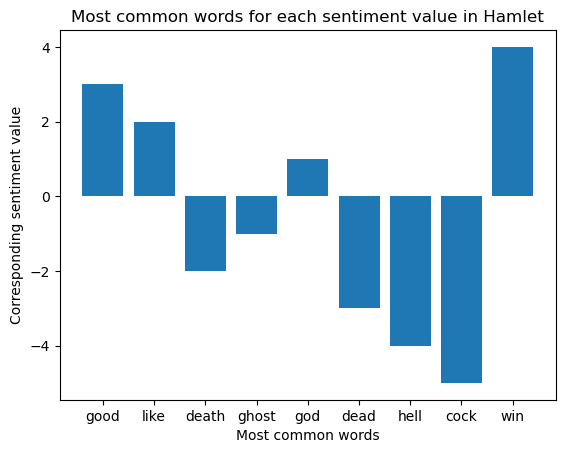

In [23]:
import matplotlib.pyplot as plt

hamlet_top_words = hamlet_words.loc[hamlet_words.groupby('value')['n'].idxmax()]\
    .sort_values(by='n', ascending=False)

plt.bar(hamlet_top_words['word'], hamlet_top_words['value'])
plt.title('Most common words for each sentiment value in Hamlet')
plt.xlabel('Most common words')
plt.ylabel('Corresponding sentiment value')